# Neighborhood Taxes

What Neighborhood is the most tax friendly, or in other words, what neighborhood has the least delinquency and the most tax abatements. You want your pizza shop in a strong healthy neighborhood where companies are not falling behind on their taxes and the government actively supporting the local area through tax breaks, this metric is measuring the health of the neighborhood through taxes.

## Criteria for the best neighborhood

- low delinquency amount
- low delinquency prior years
- high abatements amount/year
- the tax metric (encompasses the top three metrics)

In [52]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

tax_abatement = pd.read_csv("tax_abatement.csv")
tax_delinquency = pd.read_csv("tax_delinquency.csv")

neighborhoods_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

## Abatements

---

In [62]:
# make it abatement amount per year averaged across the neighborhoods
tax_abatement["abatement/year"] = tax_abatement['abatement_amount'] / tax_abatement['num_years']
mean_abatement_amount_year = tax_abatement.groupby("neighborhood").mean()['abatement/year']
abatement_amount_map = neighborhoods_map.merge(mean_abatement_amount_year, how='left', left_on='hood', right_on='neighborhood')
abatement_amount_map[['hood','abatement/year']].sort_values('abatement/year', ascending=False).head()

,hood,abatement/year
74,Homewood North,33333.333333
29,Stanton Heights,33119.047619
34,Duquesne Heights,32046.099291
22,Mount Washington,31345.238095
25,Central Northside,30021.645022


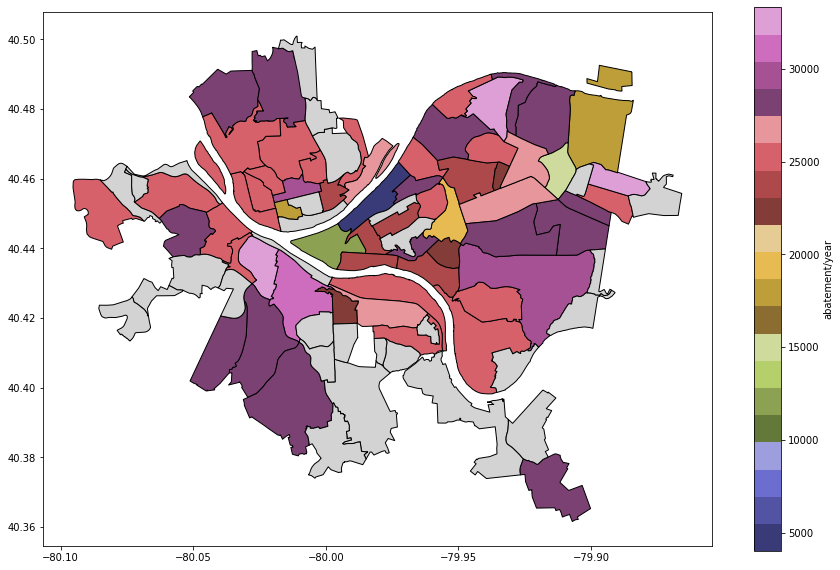

In [61]:
abatement_amount_map.plot(column='abatement/year', # set the data to be used for coloring
               cmap='tab20b',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "abatement/year"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Delinquency Amount

---

In [63]:
mean_delinquency_amount = tax_delinquency.groupby("neighborhood").mean()['current_delq']
delinquency_amount_map = neighborhoods_map.merge(mean_delinquency_amount, how='left', left_on='hood', right_on='neighborhood')
delinquency_amount_map[['hood','current_delq']].sort_values('current_delq').head()

,hood,current_delq
63,Arlington Heights,188.693333
11,Beltzhoover,228.668282
88,Glen Hazel,240.375556
19,Lincoln-Lemington-Belmar,243.604627
51,Mt. Oliver,245.529130


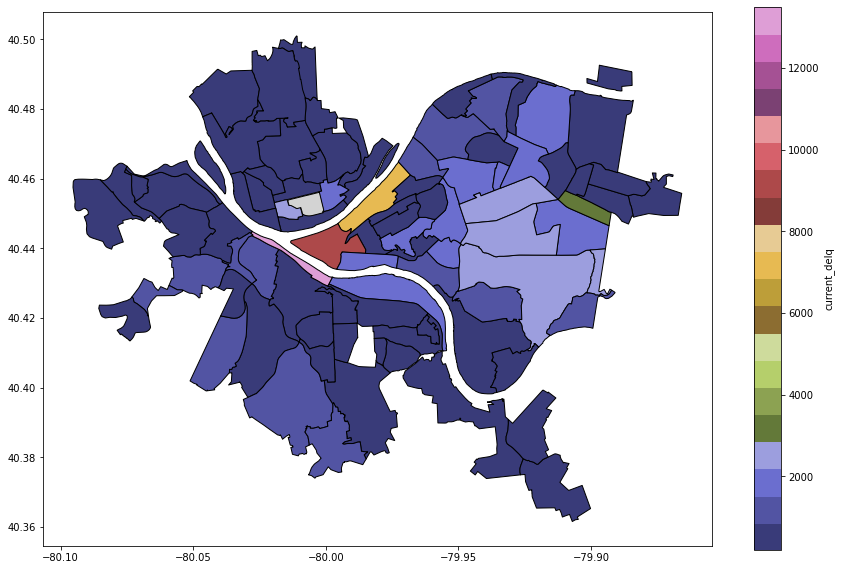

In [51]:
delinquency_amount_map.plot(column='current_delq', # set the data to be used for coloring
               cmap='tab20b',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "current_delq"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Delinquency Prior Years

---

In [64]:
mean_delinquency_year = tax_delinquency.groupby("neighborhood").mean()['prior_years']
delinquency_year_map = neighborhoods_map.merge(mean_delinquency_year, how='left', left_on='hood', right_on='neighborhood')
delinquency_year_map[['hood','prior_years']].sort_values('prior_years').head()

,hood,prior_years
0,Central Oakland,0.680000
1,North Oakland,0.767123
48,Friendship,0.913043
64,Squirrel Hill North,0.981250
67,Regent Square,1.000000


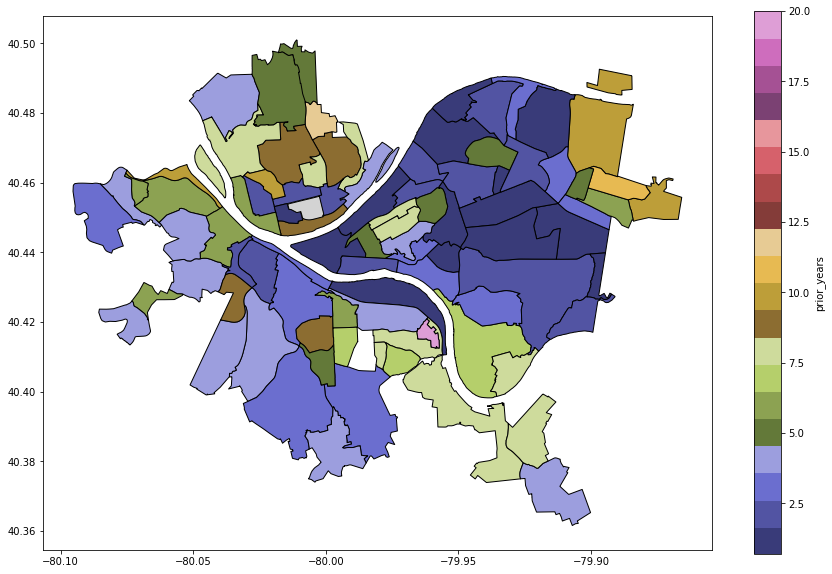

In [57]:
delinquency_year_map.plot(column='prior_years', # set the data to be used for coloring
               cmap='tab20b',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "prior_years"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Tax Metric

With the tax metric, a higher number is better.

$Tax\space Metric = 0.2(1-(percentile\space ranking\space of\space delinquency\space prior\space years)) + 0.35(percentile\space ranking\space of\space abatements) + 0.45(1-(percentile\space ranking\space of\space delinquency\space amount))$ 

In [100]:
df = pd.DataFrame()

df['abatement_rank'] = mean_abatement_amount_year.rank(pct=True)
df['delinquency_year_rank'] = mean_delinquency_year.rank(pct=True)
df['delinquency_amount_rank'] = mean_delinquency_amount.rank(pct=True)

df['tax metric'] = 0.2 * (1-df['delinquency_year_rank']) + 0.35 * (df['abatement_rank']) + .45 * (1-df['delinquency_amount_rank'])

df.sort_values('tax metric', ascending=False).head()

,abatement_rank,delinquency_year_rank,delinquency_amount_rank,tax metric
neighborhood,,,,
Homewood North,1.000000,0.977778,0.077778,0.769444
Central Northside,0.933333,0.244444,0.611111,0.652778
Mount Washington,0.950000,0.333333,0.588889,0.650833
Crafton Heights,0.825000,0.555556,0.422222,0.637639
Stanton Heights,0.983333,0.233333,0.700000,0.632500
